In [34]:
# 実際にBanditとAgentを使ってみる

import matplotlib.pyplot as plt
from bandit import *

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action() # 1. 行動を選ぶ
    reward = bandit.play(action)    # 2. 実際にプレイして報酬を得る
    agent.update(action, reward)    # 3. 行動と報酬から学ぶ
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))

print(total_reward)

860


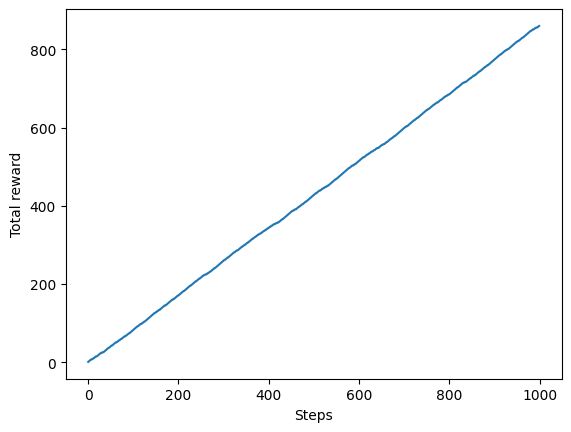

In [35]:
# グラフの描画（報酬の推移）
plt.ylabel("Total reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

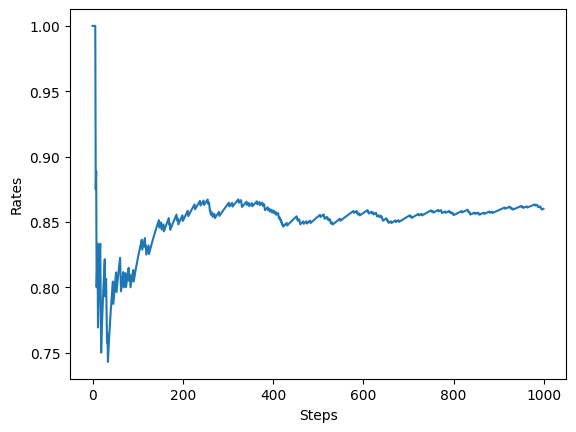

In [36]:
# グラフの描画（正答率の推移（学習の度合い））
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()

今、エージェントの行動の選択や各スロットマシンの期待値（行動の価値）の推定値はランダムに決まっている。そのため、正答率の推移は毎回異なる。

そこで、平均的な良さを次のコードにて実装する。

In [37]:
runs = 200  # 実験の回数
steps = 1000    # 各実験でのステップ数
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000)の形状の配列

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
    
    all_rates[run] = rates  # 報酬の結果を記録する

ave_rates = np.average(all_rates, axis = 0) # 各ステップで平均を求める

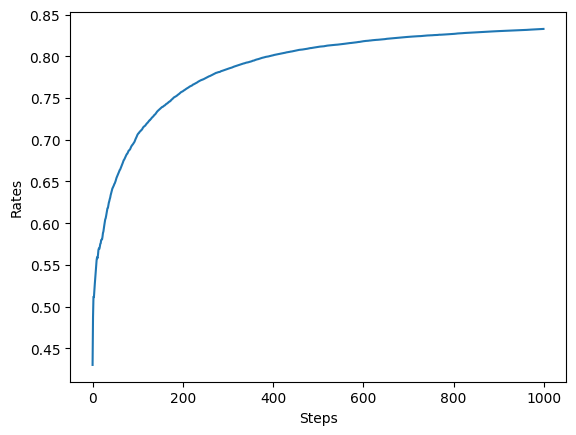

In [38]:
# グラフの描画
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(ave_rates)
plt.show()

${\varepsilon}$ の値を変化させたときの勝率の変化

In [39]:
runs = 200  # 実験の回数
steps = 1000    # 各実験でのステップ数
epsilons = [0.1, 0.3, 0.01]
all_rates = np.zeros((runs, steps)) # (200, 1000)の形状の配列
ave_rates_matrix = np.zeros((3, 1000))

for i in range(len(epsilons)):
    epsilon = epsilons[i]
    for run in range(runs):
        bandit = Bandit()
        agent = Agent(epsilon)
        total_reward = 0
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))
        
        all_rates[run] = rates  # 報酬の結果を記録する

    ave_rates = np.average(all_rates, axis = 0) # 各ステップで平均を求める
    ave_rates_matrix[i] = ave_rates


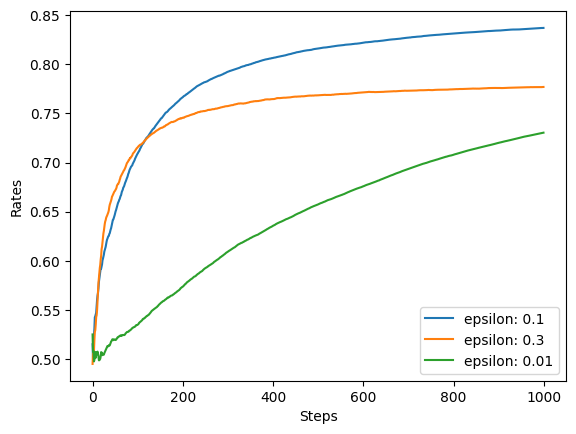

In [40]:
# グラフの描画
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(np.transpose(ave_rates_matrix), label=[f"epsilon: {epsilon_name}" for epsilon_name in epsilons])
plt.legend()
plt.show()